In [1]:
pip install sounddevice

Note: you may need to restart the kernel to use updated packages.


In [2]:
import queue
import sounddevice as sd
from vosk import Model, KaldiRecognizer
import sys
import json
import numpy as np
import csv

In [3]:
#list of all the audio devices known to my system 
print("Display input/output devices")
print(sd.query_devices())

Display input/output devices
   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   2 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  3 Speakers (7.1 Surround Sound), MME (0 in, 2 out)
   4 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   5 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   6 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   7 Primary Sound Driver, Windows DirectSound (0 in, 8 out)
   8 Speakers (7.1 Surround Sound), Windows DirectSound (0 in, 8 out)
   9 Speakers (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  10 Realtek ASIO, ASIO (2 in, 2 out)
  11 Speakers (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  12 Speakers (7.1 Surround Sound), Windows WASAPI (0 in, 8 out)
  13 Microphone Array (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  14 Headphones (), Windows WDM-KS (0 in, 2 out)
  15 Headphones (), Windows WDM-KS (0 in, 2 out)
  16 Headphones (),

In [4]:
#get the sampletate - this is needed bu the kaldi recognizer
device_info = sd.query_devices(sd.default.device[0], 'input')
samplerate = int(device_info['default_samplerate'])

# display the default input device
print("===> Initial default device Number:{} Description:{}".format(sd.default.device[0], device_info))

===> Initial default device Number:1 Description:{'name': 'Microphone Array (Realtek(R) Au', 'index': 1, 'hostapi': 0, 'max_input_channels': 2, 'max_output_channels': 0, 'default_low_input_latency': 0.09, 'default_low_output_latency': 0.09, 'default_high_input_latency': 0.18, 'default_high_output_latency': 0.18, 'default_samplerate': 44100.0}


In [5]:
"""
The next step is to create the variable 'q' which is a python ques. After that
we define the callbac fnction that will take a chunk of audio data from the 
microphone and put it on the queue. We'll show how the callback funtion is used 
soon.
"""

#setup queue and callback function
q = queue.Queue()

def recordCallback(indata, frames, time, status):
    if status:
        print(status, file=sys.strderr)
    q.put(bytes(indata))

In [6]:
#build the model and recognizer objects
print("===> Build the model and recognizer objects. This will take a few minutes.")
model = Model(r"C:\Users\ASUS\Downloads\vosk-model-small-en-us-0.15\vosk-model-small-en-us-0.15")
recognizer = KaldiRecognizer(model, samplerate)
recognizer.SetWords(False)

===> Build the model and recognizer objects. This will take a few minutes.


In [46]:
print("===> Begin recording. Press Ctrl+C to stop the recording")
try:
    with sd.RawInputStream(dtype='int16',
                          channels=1,
                          callback=recordCallback):
        while True:
            data = q.get()
            #demo_list =[]
            
            if recognizer.AcceptWaveform(data):
                recognizerResult = recognizer.Result()
                # convert the recognizerResult string into a dictionary  
                resultDict = json.loads(recognizerResult)
                print(resultDict['text'])
                if not resultDict.get("text", "") == "":
                    x_test = open("test_data_out.csv", 'a')
                    print(resultDict['text'], file = x_test)
                    x_test.close()
                    
                    
                else:
                    print("no input sound")

except KeyboardInterrupt:
    print('===> Finished Recording')
except Exception as e:
    print(str(e))

===> Begin recording. Press Ctrl+C to stop the recording

no input sound
i have a dream that one the
down in alabama
ricketts vicious racists with it's governor having his lips reaping with the words of into possession and nullification running the right there in alabama
little black boys and black girls will be able to join hands with little white boys and white girls sisters and brothers
i have a dream to do i have a dream that one day is the valley shall be exhaustive and every he'll and mountain challenging it and even though
in the grave in this review our perhaps the most feature in history i sent to every household of my depot both at home
i am
what i'm calmer months to as you see adelstein and the dark for my reaction and this boy time or about being a result
===> Finished Recording


In [47]:
!pip install textblob

In [18]:
!pip install wordcloud

In [48]:
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("test_data_out.csv")

In [50]:
df.head(1)

,i have a dream that one the
0,down in alabama


In [51]:
df = pd.read_csv("test_data_out.csv", sep='\t', names = ["Text"])

In [52]:
df.head()

,Text
0,i have a dream that one the
1,down in alabama
2,ricketts vicious racists with it's governor ha...
3,little black boys and black girls will be able...
4,i have a dream to do i have a dream that one d...


In [53]:
# Clean the text 

# Create a function to clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # Removed @
    text = re.sub(r'[0-9\.]+',' ', text)
    text = re.sub(r'#', '', text) #Removed #tags
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\s', '', text) #removing hyperlinks
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'_', '', text) #remoed _
    text = re.sub(r'https', '', text)
    text = re.sub(r't', '', text)
    text = re.sub(r'co', '', text)
    text = text.lower()
    return text

In [54]:
df["Text"] = df["Text"].apply(cleanTxt)

In [55]:
data = pd.DataFrame(df["Text"])
data

,Text
0,i have a dream ha one he
1,down in alabama
2,rickes vicious raciss wih i s governor having ...
3,lile black boys and black girls will be able o...
4,i have a dream o do i have a dream ha one day ...
5,in he grave in his review our perhaps he mos f...
6,i am
7,wha i m calmer monhs o as you see adelsein and...


In [56]:
#Create a function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 


#Create two new column 

data["Subjectivity"] = data["Text"].apply(getSubjectivity)
data["Polarity"] = data["Text"].apply(getPolarity)

data.head(15)
    

,Text,Subjectivity,Polarity
0,i have a dream ha one he,0.000000,0.000000
1,down in alabama,0.288889,-0.155556
2,rickes vicious raciss wih i s governor having ...,1.000000,-1.000000
3,lile black boys and black girls will be able o...,0.497222,0.055556
4,i have a dream o do i have a dream ha one day ...,1.000000,0.500000
5,in he grave in his review our perhaps he mos f...,0.000000,0.000000
6,i am,0.000000,0.000000
7,wha i m calmer monhs o as you see adelsein and...,0.400000,-0.150000


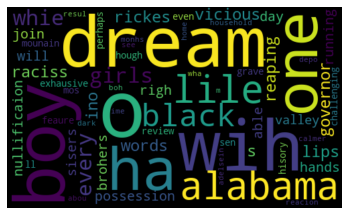

In [57]:
# plot Wordcloud / TextCloud

allwords = ' '.join([twts for twts in data["Text"]])
wordCloud = WordCloud(width= 500, height=300, random_state=21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
# Create a function to compute the Sentiment

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data["Analysis"] = data["Polarity"].apply(analysis)
data.head()

,Text,Subjectivity,Polarity,Analysis
0,i have a dream ha one he,0.000000,0.000000,Neutral
1,down in alabama,0.288889,-0.155556,Negative
2,rickes vicious raciss wih i s governor having ...,1.000000,-1.000000,Negative
3,lile black boys and black girls will be able o...,0.497222,0.055556,Positive
4,i have a dream o do i have a dream ha one day ...,1.000000,0.500000,Positive


In [59]:
#Show the value content

data["Analysis"].value_counts(normalize=True).to_frame().style.format('{:.2%}')

,Analysis
Neutral,37.50%
Negative,37.50%
Positive,25.00%


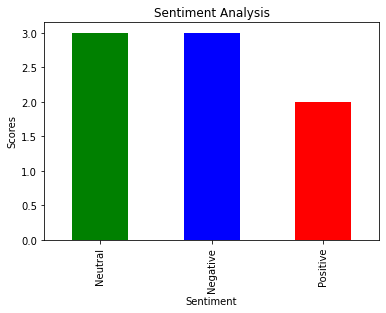

In [60]:
#Plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
data["Analysis"].value_counts().plot(kind="bar", color=['green', 'blue', 'red'])
plt.show()

In [61]:
# Save the final dataset
data.to_csv('ashraful.csv')

Accuracuy Score:  0.0
